# CZ4032 Data Analytics & Mining
## Assignment - 1: Part 4
### Dataset: breast-w, iris, glass, heart, tic-tac-toe, acute-inflammations (additional), balance-scale (additional)

### Team - 15
* Mundhra Divyesh
* Gupta Jay
* Kanodia Ritwik
* Dandapath Soham

> **Warning:** This notebook was created on the Kaggle platform where it fetches data from the Kaggle directories. It will not work by default on the Jupyter Notebook Platform.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics

## Data Preparation (breast-w)
> https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

In [2]:
data = pd.read_csv("../input/breastcancerwisconsinoriginal/breast-cancer-wisconsin.csv", header = 0)
data.rename(columns={'class': 'diagnosis'}, inplace=True)
data = data[data["bare_nucleoli"].str.contains("\?") == False]
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 683 non-null    int64 
 1   clump_thickness    683 non-null    int64 
 2   size_uniformity    683 non-null    int64 
 3   shape_uniformity   683 non-null    int64 
 4   marginal_adhesion  683 non-null    int64 
 5   epithelial_size    683 non-null    int64 
 6   bare_nucleoli      683 non-null    object
 7   bland_chromatin    683 non-null    int64 
 8   normal_nucleoli    683 non-null    int64 
 9   mitoses            683 non-null    int64 
 10  diagnosis          683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [4]:
data.drop("id",axis=1,inplace=True)

In [5]:
features = list(data.columns[0:9])
print(features)

['clump_thickness', 'size_uniformity', 'shape_uniformity', 'marginal_adhesion', 'epithelial_size', 'bare_nucleoli', 'bland_chromatin', 'normal_nucleoli', 'mitoses']


In [6]:
data['diagnosis'] = data['diagnosis'].map({4:1, 2:0})

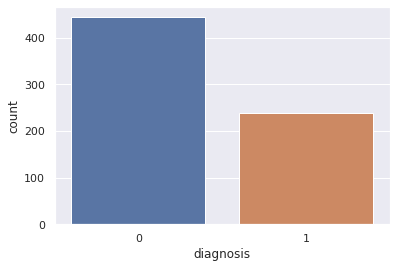

In [7]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="diagnosis", data=data)

In [8]:
prediction_var = features

In [9]:
X = data[prediction_var]
y = data.diagnosis 

## Data Preparation (iris)
> https://archive.ics.uci.edu/ml/datasets/iris

In [10]:
iris_data = pd.read_csv("../input/iris/Iris.csv", header = 0)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
iris_data.drop("Id",axis=1,inplace=True)

In [13]:
features = list(iris_data.columns[0:4])
print(features)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [14]:
iris_data['Species'] = iris_data['Species'].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica": 2})

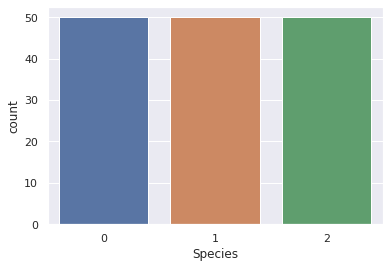

In [15]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Species", data=iris_data)

In [16]:
prediction_var = features

In [17]:
X_iris = iris_data[prediction_var]
y_iris = iris_data.Species 

## Data Preparation (pima-diabetes)
> http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [18]:
pima_diabetes_data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv", header = 0)
pima_diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
pima_diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
features = list(pima_diabetes_data.columns[0:8])
print(features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


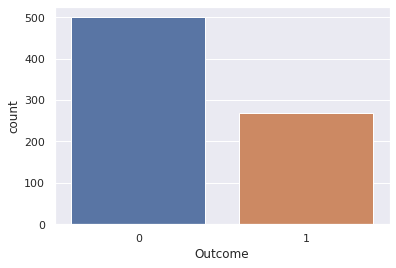

In [21]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Outcome", data=pima_diabetes_data)

In [22]:
prediction_var = features

In [23]:
X_pima_diabetes = pima_diabetes_data[prediction_var]
y_pima_diabetes = pima_diabetes_data.Outcome 

## Data Preparation (heart)
> https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [24]:
heart_data = pd.read_csv("../input/heart-disease-uci/heart.csv", header = 0)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
features = list(heart_data.columns[0:13])
print(features)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


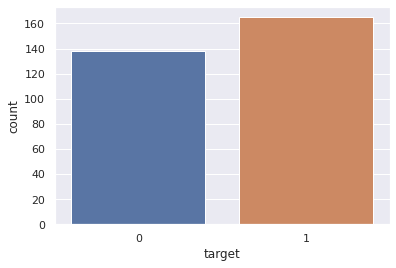

In [27]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="target", data=heart_data)

In [28]:
prediction_var = features

In [29]:
X_heart = heart_data[prediction_var]
y_heart = heart_data.target 

## Data Preparation (tic-tac-toe)
> https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame

In [30]:
tictactoe_data = pd.read_csv("../input/tictactoe-endgame-dataset-uci/tic-tac-toe-endgame.csv", header = 0)
tictactoe_data.replace('x',0,inplace=True)
tictactoe_data.replace('o',1,inplace=True)
tictactoe_data.replace('b',2,inplace=True)
tictactoe_data.replace('negative',0,inplace=True)
tictactoe_data.replace('positive',1,inplace=True)
tictactoe_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0,0,0,0,1,1,0,1,1,1
1,0,0,0,0,1,1,1,0,1,1
2,0,0,0,0,1,1,1,1,0,1
3,0,0,0,0,1,1,1,2,2,1
4,0,0,0,0,1,1,2,1,2,1


In [31]:
tictactoe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      958 non-null    int64
 1   V2      958 non-null    int64
 2   V3      958 non-null    int64
 3   V4      958 non-null    int64
 4   V5      958 non-null    int64
 5   V6      958 non-null    int64
 6   V7      958 non-null    int64
 7   V8      958 non-null    int64
 8   V9      958 non-null    int64
 9   V10     958 non-null    int64
dtypes: int64(10)
memory usage: 75.0 KB


In [32]:
features = list(tictactoe_data.columns[0:9])
print(features)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']


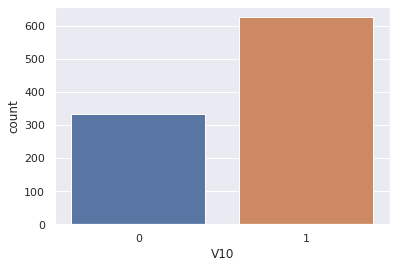

In [33]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="V10", data = tictactoe_data)

In [34]:
prediction_var = features

In [35]:
X_tictactoe = tictactoe_data[prediction_var]
y_tictactoe = tictactoe_data.V10 

## Data Preparation (acute-inflammations) (additional)
> https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations

In [36]:
inflammations_data = pd.read_csv("../input/acute-inflammations-data-set/diagnosis.csv", header = 0)
inflammations_data = inflammations_data.iloc[: , :-1]
inflammations_data.rename(columns={'6': 'diagnosis'}, inplace=True)
inflammations_data.head()

,0,1,2,3,4,5,diagnosis
0,35.5,0,1,0,0,0,0
1,35.9,0,0,1,1,1,1
2,35.9,0,1,0,0,0,0
3,36.0,0,0,1,1,1,1
4,36.0,0,1,0,0,0,0


In [37]:
inflammations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0          120 non-null    float64
 1   1          120 non-null    int64  
 2   2          120 non-null    int64  
 3   3          120 non-null    int64  
 4   4          120 non-null    int64  
 5   5          120 non-null    int64  
 6   diagnosis  120 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.7 KB


In [38]:
features = list(inflammations_data.columns[0:6])
print(features)

['0', '1', '2', '3', '4', '5']


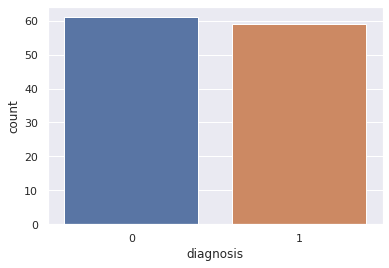

In [39]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="diagnosis", data = inflammations_data)

In [40]:
prediction_var = features

In [41]:
X_inflammations = inflammations_data[prediction_var]
y_inflammations = inflammations_data.diagnosis 

## Data Preparation (balance-scale) (additional)
> https://archive.ics.uci.edu/ml/datasets/Balance+Scale

In [42]:
balance_scale_data = pd.read_csv("../input/balance-scale/balance-scale.csv", header = 0)
balance_scale_data.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [43]:
balance_scale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [44]:
features = list(balance_scale_data.columns[1:5])
print(features)

['L-Weight', 'L-Distance', 'R-Weight', 'R-Distance']


In [45]:
balance_scale_data['Class'] = balance_scale_data['Class'].map({"B":0, "L":1, "R": 2})

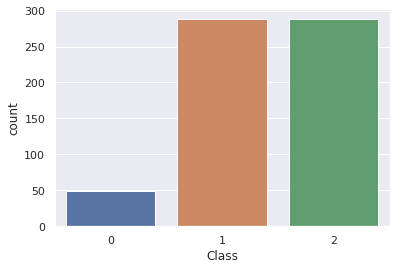

In [46]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Class", data = balance_scale_data)

In [47]:
prediction_var = features

In [48]:
X_balance_scale = balance_scale_data[prediction_var]
y_balance_scale = balance_scale_data.Class

In [49]:
def printAccuracy(model, dataset, X, y):
    print("Dataset: ", dataset)
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scoring = ['accuracy', 'f1_macro']
    for score_metric in scoring:
        scores = cross_val_score(model, X, y, cv=cv, scoring= score_metric)
        print(score_metric, " %0.3f, standard deviation: %0.3f" % (scores.mean(), scores.std()), end = " ")
        print(",mean error rate: %0.3f" % (1 - scores.mean()))
    print()

## Random Forest

In [50]:
model = RandomForestClassifier()
printAccuracy(model, "breast-w", X, y)
printAccuracy(model, "iris", X_iris, y_iris)
printAccuracy(model, "pima-diabetes", X_pima_diabetes, y_pima_diabetes)
printAccuracy(model, "heart", X_heart, y_heart)
printAccuracy(model, "tic-tac-toe", X_tictactoe, y_tictactoe)
printAccuracy(model, "acute-inflammations (additional)", X_inflammations, y_inflammations)
printAccuracy(model, "balance-scale (additional)", X_balance_scale, y_balance_scale)

Dataset:  breast-w
accuracy  0.966, standard deviation: 0.019 ,mean error rate: 0.034
f1_macro  0.966, standard deviation: 0.021 ,mean error rate: 0.034

Dataset:  iris
accuracy  0.940, standard deviation: 0.063 ,mean error rate: 0.060
f1_macro  0.937, standard deviation: 0.077 ,mean error rate: 0.063

Dataset:  pima-diabetes
accuracy  0.760, standard deviation: 0.057 ,mean error rate: 0.240
f1_macro  0.721, standard deviation: 0.063 ,mean error rate: 0.279

Dataset:  heart
accuracy  0.809, standard deviation: 0.100 ,mean error rate: 0.191
f1_macro  0.826, standard deviation: 0.093 ,mean error rate: 0.174

Dataset:  tic-tac-toe
accuracy  0.933, standard deviation: 0.021 ,mean error rate: 0.067
f1_macro  0.944, standard deviation: 0.022 ,mean error rate: 0.056

Dataset:  acute-inflammations (additional)
accuracy  1.000, standard deviation: 0.000 ,mean error rate: 0.000
f1_macro  1.000, standard deviation: 0.000 ,mean error rate: 0.000

Dataset:  balance-scale (additional)
accuracy  0.81

## Support Vector Machine

In [51]:
model = svm.SVC()
printAccuracy(model, "breast-w", X, y)
printAccuracy(model, "iris", X_iris, y_iris)
printAccuracy(model, "pima-diabetes", X_pima_diabetes, y_pima_diabetes)
printAccuracy(model, "heart", X_heart, y_heart)
printAccuracy(model, "tic-tac-toe", X_tictactoe, y_tictactoe)
printAccuracy(model, "acute-inflammations (additional)", X_inflammations, y_inflammations)
printAccuracy(model, "balance-scale (additional)", X_balance_scale, y_balance_scale)

Dataset:  breast-w
accuracy  0.972, standard deviation: 0.025 ,mean error rate: 0.028
f1_macro  0.969, standard deviation: 0.027 ,mean error rate: 0.031

Dataset:  iris
accuracy  0.960, standard deviation: 0.033 ,mean error rate: 0.040
f1_macro  0.953, standard deviation: 0.040 ,mean error rate: 0.047

Dataset:  pima-diabetes
accuracy  0.760, standard deviation: 0.039 ,mean error rate: 0.240
f1_macro  0.705, standard deviation: 0.058 ,mean error rate: 0.295

Dataset:  heart
accuracy  0.638, standard deviation: 0.094 ,mean error rate: 0.362
f1_macro  0.612, standard deviation: 0.093 ,mean error rate: 0.388

Dataset:  tic-tac-toe
accuracy  0.894, standard deviation: 0.044 ,mean error rate: 0.106
f1_macro  0.872, standard deviation: 0.053 ,mean error rate: 0.128

Dataset:  acute-inflammations (additional)
accuracy  0.425, standard deviation: 0.120 ,mean error rate: 0.575
f1_macro  0.345, standard deviation: 0.130 ,mean error rate: 0.655

Dataset:  balance-scale (additional)
accuracy  0.90

## Decision Tree

In [52]:
model = DecisionTreeClassifier()
printAccuracy(model, "breast-w", X, y)
printAccuracy(model, "iris", X_iris, y_iris)
printAccuracy(model, "pima-diabetes", X_pima_diabetes, y_pima_diabetes)
printAccuracy(model, "heart", X_heart, y_heart)
printAccuracy(model, "tic-tac-toe", X_tictactoe, y_tictactoe)
printAccuracy(model, "acute-inflammations (additional)", X_inflammations, y_inflammations)
printAccuracy(model, "balance-scale (additional)", X_balance_scale, y_balance_scale)

Dataset:  breast-w
accuracy  0.944, standard deviation: 0.029 ,mean error rate: 0.056
f1_macro  0.939, standard deviation: 0.032 ,mean error rate: 0.061

Dataset:  iris
accuracy  0.947, standard deviation: 0.065 ,mean error rate: 0.053
f1_macro  0.936, standard deviation: 0.069 ,mean error rate: 0.064

Dataset:  pima-diabetes
accuracy  0.706, standard deviation: 0.070 ,mean error rate: 0.294
f1_macro  0.670, standard deviation: 0.061 ,mean error rate: 0.330

Dataset:  heart
accuracy  0.766, standard deviation: 0.096 ,mean error rate: 0.234
f1_macro  0.744, standard deviation: 0.094 ,mean error rate: 0.256

Dataset:  tic-tac-toe
accuracy  0.870, standard deviation: 0.033 ,mean error rate: 0.130
f1_macro  0.856, standard deviation: 0.034 ,mean error rate: 0.144

Dataset:  acute-inflammations (additional)
accuracy  1.000, standard deviation: 0.000 ,mean error rate: 0.000
f1_macro  1.000, standard deviation: 0.000 ,mean error rate: 0.000

Dataset:  balance-scale (additional)
accuracy  0.77